In [2]:
import random
import torch
import numpy as np
from d2l import torch as d2l

In [3]:
import  time
class Timer: #@save
    """记录多次运行时间"""

    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        """启动计时器"""
        self.tik = time.time()  
    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()



In [4]:
def synthetic_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
#features-x
#lables-y

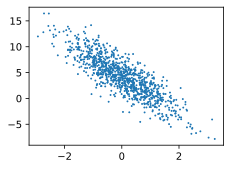

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(),1)
#torch.tensor.detach()使梯度无法使用不被计算
#s-散点半径

In [7]:
def data_iter(features, labels, batch_size):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:i + batch_size])

        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10
for X, y in data_iter(features, labels, batch_size):
    print(X,'\n',y)
    break

tensor([[ 0.8109, -0.4242],
        [-1.1865, -0.5415],
        [ 0.8919,  1.2335],
        [-0.6291, -0.5535],
        [-1.0593,  1.5568],
        [-1.4003, -0.4047],
        [ 2.0085,  1.4116],
        [ 1.2771,  0.0780],
        [-0.8043,  1.9711],
        [ 0.6277, -0.3309]]) 
 tensor([[ 7.2673],
        [ 3.6590],
        [ 1.7986],
        [ 4.8194],
        [-3.1915],
        [ 2.7825],
        [ 3.4130],
        [ 6.4963],
        [-4.0909],
        [ 6.5822]])


In [9]:
w=torch.normal(0,0.01,(2,1),requires_grad=True)
# w=torch.tensor([0,0],dtype=torch.float,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [16]:
def loss(y_hat,y):
    return ((y_hat-y.reshape(y_hat.shape)))**2/2
#均方损失，(batch,1)
def sgd(params, lr, batch_size):
    with torch.no_grad():
        #不反向传播,不构建图
        for param in params:
            param-=lr*param.grad/batch_size
            
            param.grad.zero_()
            #清楚存在当前w,b，中的梯度
def linear(X, w, b):
    return torch.matmul(X, w) + b

epochs=10
lr=0.1
net=linear
for epoch in range(epochs):
    for X, y in data_iter(features, labels, batch_size):
        #此时有图被创建
        l = loss(net(X,w,b), y)
        l.sum().backward()
        print("X--",-X.T@(y-X@w-b))
        print('w--',w.grad)
        #反向传播计算梯度
        sgd([w,b], lr, batch_size)
        
    #不创建图
    with torch.no_grad():
        train_1=loss(net(features,w,b), labels)
        # print(f'epoch:{epoch}, loss:{train_1.mean():.8f}')
print(w,b)

X-- tensor([[-0.0077],
        [-0.0191]], grad_fn=<MmBackward0>)
w-- tensor([[-0.0077],
        [-0.0191]])
X-- tensor([[-0.0936],
        [ 0.0336]], grad_fn=<MmBackward0>)
w-- tensor([[-0.0936],
        [ 0.0336]])
X-- tensor([[ 0.0170],
        [-0.0086]], grad_fn=<MmBackward0>)
w-- tensor([[ 0.0170],
        [-0.0086]])
X-- tensor([[ 0.0067],
        [-0.0078]], grad_fn=<MmBackward0>)
w-- tensor([[ 0.0067],
        [-0.0078]])
X-- tensor([[0.0330],
        [0.0239]], grad_fn=<MmBackward0>)
w-- tensor([[0.0330],
        [0.0239]])
X-- tensor([[ 0.0366],
        [-0.0249]], grad_fn=<MmBackward0>)
w-- tensor([[ 0.0366],
        [-0.0249]])
X-- tensor([[0.0473],
        [0.0749]], grad_fn=<MmBackward0>)
w-- tensor([[0.0473],
        [0.0749]])
X-- tensor([[-0.0247],
        [-0.0207]], grad_fn=<MmBackward0>)
w-- tensor([[-0.0247],
        [-0.0207]])
X-- tensor([[-0.0428],
        [-0.0082]], grad_fn=<MmBackward0>)
w-- tensor([[-0.0428],
        [-0.0082]])
X-- tensor([[0.0493],
     